In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r"C:\Users\visha\Downloads\customer_churn_dataset-testing-master.csv\customer_churn_dataset-testing-master.csv")

In [3]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [5]:
df.drop('CustomerID',axis=1,inplace=True)

In [6]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [7]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Female    34353
Male      30021
Name: count, dtype: int64

In [10]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [12]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [16]:
dummy_pdf = pd.get_dummies(df['Subscription Type'],dtype=int,drop_first=True)

In [24]:
df2 = pd.concat([df,dummy_pdf],axis=1).drop('Subscription Type',axis=1)

In [27]:
df2['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [28]:
dummy_pdf_2 = pd.get_dummies(df2['Contract Length'],dtype=int,drop_first=True)

In [32]:
df3 = pd.concat([df2,dummy_pdf_2],axis=1).drop('Contract Length',axis=1)

In [33]:
df3

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Premium,Standard,Monthly,Quarterly
0,22,0,25,14,4,27,598,9,1,0,0,1,0
1,41,0,28,28,7,13,584,20,0,0,1,1,0
2,47,1,27,10,2,29,757,21,0,1,0,0,0
3,35,1,9,12,5,17,232,18,0,1,0,0,1
4,53,0,58,24,9,2,533,18,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,947,14,1,0,0,0,1
64370,37,1,6,1,5,22,923,9,1,0,1,0,0
64371,25,1,39,14,8,30,327,20,1,1,0,1,0
64372,50,0,18,19,7,22,540,13,1,0,1,1,0


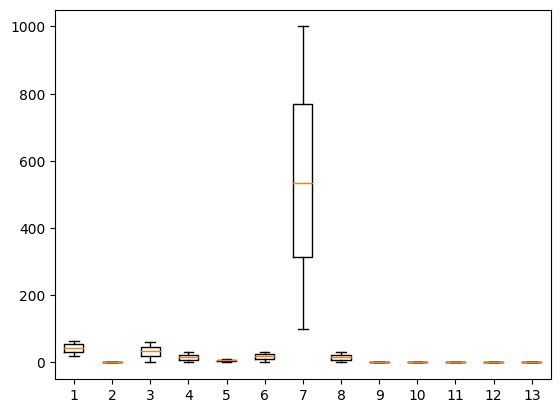

In [35]:
plt.boxplot(df3)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f622168a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1f62216bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6221683a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f62216ae90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6220c6c80>],
 'means': []}

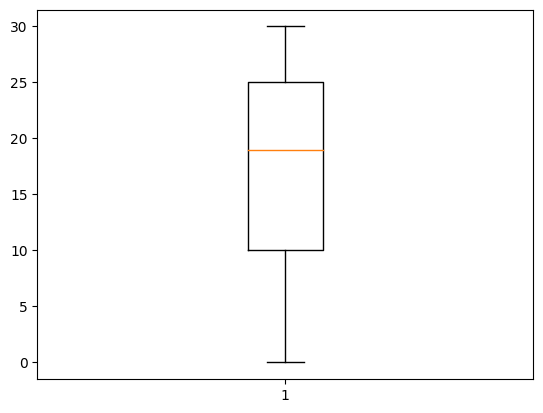

In [38]:
plt.boxplot(df3["Payment Delay"])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate IQR
Q1 = df3["Payment Delay"].quantile(0.25)
Q3 = df3["Payment Delay"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper caps
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df3["Payment Delay_capped"] = np.where(
    df3["Payment Delay"] < lower_bound, lower_bound,
    np.where(df3["Payment Delay"] > upper_bound, upper_bound, df3["Payment Delay"])
)

In [39]:
x = df3.drop('Churn',axis=1)

In [40]:
y = df3['Churn']

In [41]:
x

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Premium,Standard,Monthly,Quarterly
0,22,0,25,14,4,27,598,9,0,0,1,0
1,41,0,28,28,7,13,584,20,0,1,1,0
2,47,1,27,10,2,29,757,21,1,0,0,0
3,35,1,9,12,5,17,232,18,1,0,0,1
4,53,0,58,24,9,2,533,18,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,947,14,0,0,0,1
64370,37,1,6,1,5,22,923,9,0,1,0,0
64371,25,1,39,14,8,30,327,20,1,0,1,0
64372,50,0,18,19,7,22,540,13,0,1,1,0


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
x_scaled

array([[-1.43420211, -0.93482484, -0.40909964, ..., -0.70819451,
         1.38163018, -0.69173877],
       [-0.0697304 , -0.93482484, -0.23364156, ...,  1.41204144,
         1.38163018, -0.69173877],
       [ 0.36115541,  1.06971912, -0.29212759, ..., -0.70819451,
        -0.72378269, -0.69173877],
       ...,
       [-1.21875921,  1.06971912,  0.40970473, ..., -0.70819451,
         1.38163018, -0.69173877],
       [ 0.57659831, -0.93482484, -0.81850183, ...,  1.41204144,
         1.38163018, -0.69173877],
       [ 0.72022691, -0.93482484,  0.76062088, ...,  1.41204144,
         1.38163018, -0.69173877]])

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42, stratify=y)

In [47]:
logi = LogisticRegression()

In [48]:
logi.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred = logi.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [55]:
cm = confusion_matrix(y_pred,y_test)

In [54]:
accuracy_score(y_test,y_pred)

0.8271067961165048

In [58]:
cm

array([[5625, 1075],
       [1151, 5024]], dtype=int64)

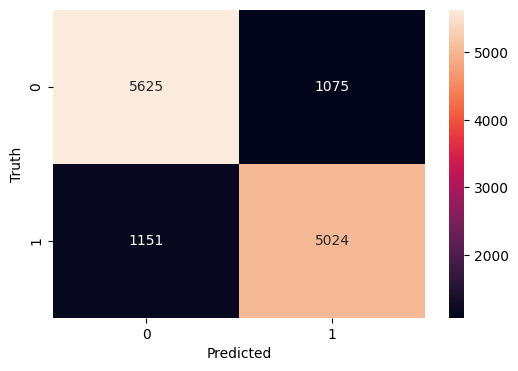

In [65]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d')
plt.ylabel('Truth')
plt.xlabel("Predicted")
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      6776
           1       0.81      0.82      0.82      6099

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



In [84]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [69]:
logi.predict_proba(x_test)[:, 1]

array([0.01557009, 0.06244523, 0.08853029, ..., 0.03259085, 0.42935828,
       0.40459907])

In [81]:
y_pred_prob = logi.predict_proba(x_test)[:, 1]

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [85]:
roc_auc = auc(fpr, tpr)

In [86]:
print("AUC Score:", roc_auc)

AUC Score: 0.9030013049151806


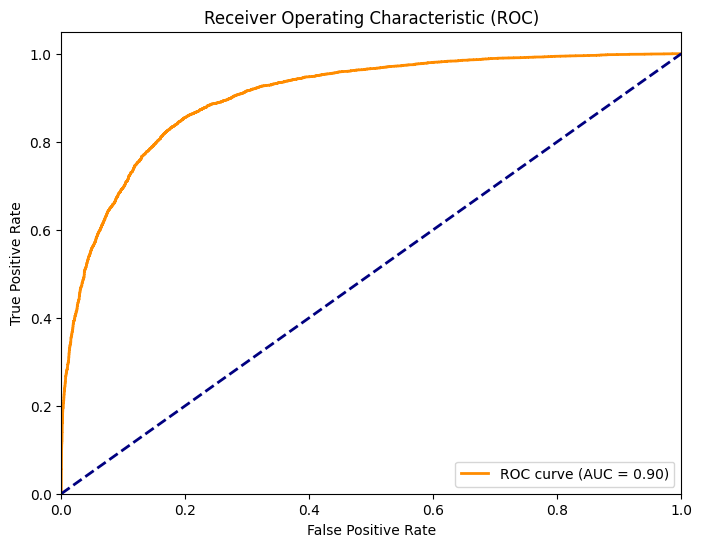

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()